In [1]:
#Setup - mainly importing packages
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
# Load data
url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
df = pd.read_csv(url)

#Data Inspection/Cleaning process

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1457 non-null   object 
 1   cases_new                1457 non-null   int64  
 2   cases_import             1457 non-null   int64  
 3   cases_recovered          1457 non-null   int64  
 4   cases_active             1457 non-null   int64  
 5   cases_cluster            1457 non-null   int64  
 6   cases_unvax              1457 non-null   int64  
 7   cases_pvax               1457 non-null   int64  
 8   cases_fvax               1457 non-null   int64  
 9   cases_boost              1457 non-null   int64  
 10  cases_child              1457 non-null   int64  
 11  cases_adolescent         1457 non-null   int64  
 12  cases_adult              1457 non-null   int64  
 13  cases_elderly            1457 non-null   int64  
 14  cases_0_4               

In [4]:
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.isna().sum())

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             356
cluster_religious          356
cluster_community          356
cluster_highRisk           356
cluster_education          356
cluster_detentionCentre    356
cluster_workplace          356
dtype: int64


In [6]:
#NaN value into 0, assume no cases
df = df.fillna(0)
print(df.isna().sum())

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,1457.0,3613.841455,5954.317880,0.0,182.0,1384.0,3780.0,33406.0
cases_import,1457.0,26.838023,83.126161,0.0,1.0,4.0,10.0,719.0
cases_recovered,1457.0,3577.477008,5905.251973,0.0,160.0,1390.0,3804.0,33872.0
cases_active,1457.0,43642.861359,66137.851106,1.0,10129.0,18280.0,43883.0,323791.0
cases_cluster,1457.0,366.724777,661.009527,0.0,0.0,27.0,447.0,3394.0
cases_unvax,1457.0,1398.457790,2499.087764,0.0,38.0,201.0,1458.0,12681.0
cases_pvax,1457.0,299.695264,1084.673705,0.0,0.0,4.0,27.0,7315.0
cases_fvax,1457.0,967.132464,2083.567121,0.0,0.0,82.0,558.0,13060.0
cases_boost,1457.0,948.555937,2435.958529,0.0,0.0,82.0,840.0,18170.0
cases_child,1457.0,442.281400,827.382406,0.0,11.0,98.0,364.0,4389.0


In [8]:
# Slice every 6th data
df = df[5::6]

# Contain the time steps into a separate variable
date_time = pd.to_datetime(df.pop('date'), format='%Y-%m-%d')

In [9]:
df.head()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
5,1,1,0,8,0,1,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2,2,1,11,0,2,0,0,0,1,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0,0,0,15,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0,0,3,11,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


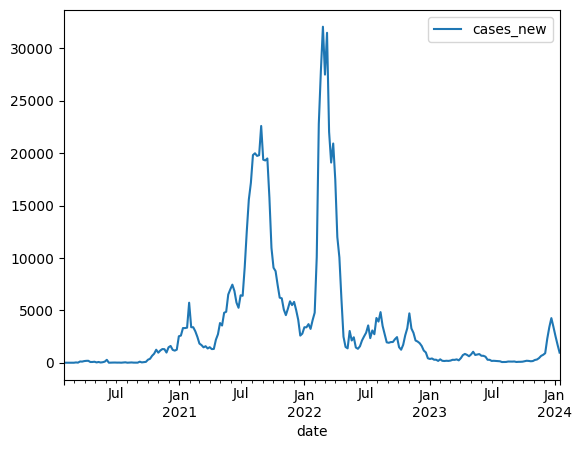

In [10]:
plot_cols = ['cases_new']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [11]:
#Data Splitting - 70:20:10 for train-validation-test
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [12]:
#Data normalization - standard scaling
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [13]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [14]:
w2 = WindowGenerator(input_width=30, label_width=30, shift=1, label_columns=['cases_new'],train_df=train_df,
    val_df=val_df,test_df=test_df)
w2

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['cases_new']

In [15]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [19]:
# Assuming to create a batch of windows for the first three samples
example_indices = [0, 1, 2]
example_window = tf.stack([np.array(train_df[i:i+w2.total_window_size]) for i in example_indices])

# Split the window into inputs and labels using the WindowGenerator's split_window method
example_inputs, example_labels = w2.split_window(example_window)

# Print the shapes
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 31, 30)
Inputs shape: (3, 30, 30)
Labels shape: (3, 30, 1)


In [20]:
w2.example = example_inputs, example_labels

In [21]:
def plot(self, model=None, plot_col='cases_new', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Day')

WindowGenerator.plot = plot

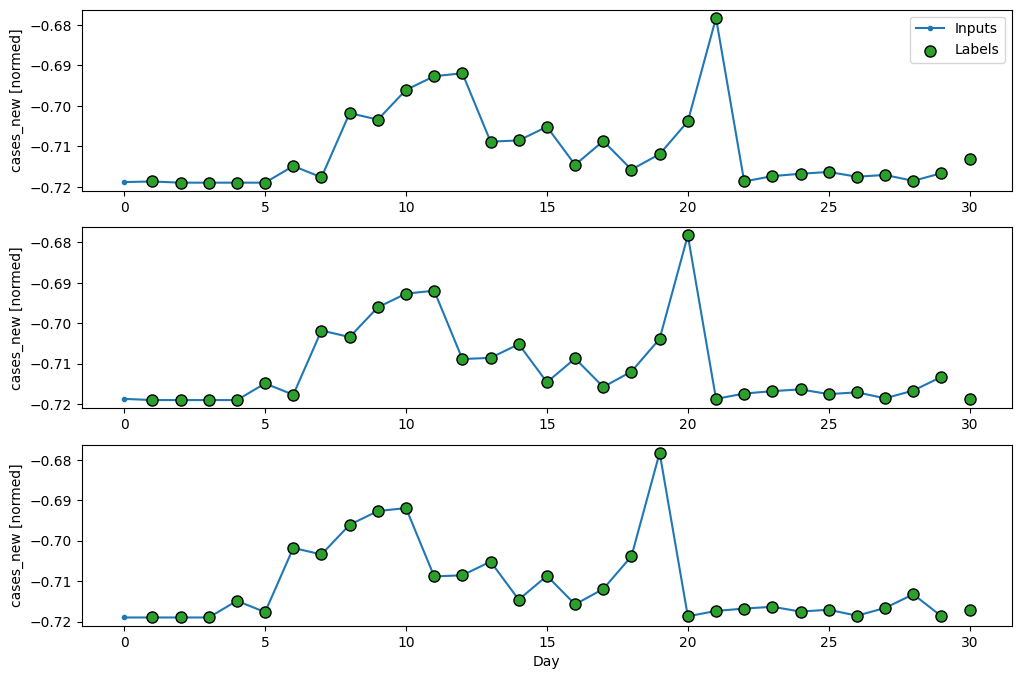

In [22]:
w2.plot()

In [23]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [25]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 30, 30), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))

In [28]:
#Data Windowing 
w3 = WindowGenerator(input_width=30, label_width=30, shift=0, label_columns=['cases_new'],train_df=train_df,
    val_df=val_df,test_df=test_df)
w3

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label column name(s): ['cases_new']

In [45]:
#Create LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [46]:
PATH = r'D:\SHRDC\DLTS\Covid 19 Cases Prediction'
logpath = os.path.join(PATH, "tensorboard_log", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(logpath, exist_ok=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logpath)

In [47]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=20):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS, validation_data=window.val,
                      callbacks=[early_stopping, tensorboard_callback])
  return history

In [48]:
#Model training
history_single_step = compile_and_fit(lstm_model,w3)

Epoch 1/200
5/5 [==============================] - 4s 165ms/step - loss: 1.0391 - mean_absolute_percentage_error: 187.0949 - val_loss: 0.0309 - val_mean_absolute_percentage_error: 19.6203
Epoch 2/200
5/5 [==============================] - 0s 26ms/step - loss: 0.3908 - mean_absolute_percentage_error: 224.2518 - val_loss: 0.0881 - val_mean_absolute_percentage_error: 43.8077
Epoch 3/200
5/5 [==============================] - 0s 26ms/step - loss: 0.2688 - mean_absolute_percentage_error: 196.4541 - val_loss: 0.0196 - val_mean_absolute_percentage_error: 18.3803
Epoch 4/200
5/5 [==============================] - 0s 26ms/step - loss: 0.1602 - mean_absolute_percentage_error: 128.3325 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 21.8402
Epoch 5/200
5/5 [==============================] - 0s 27ms/step - loss: 0.1078 - mean_absolute_percentage_error: 94.7079 - val_loss: 0.0335 - val_mean_absolute_percentage_error: 26.8053
Epoch 6/200
5/5 [==============================] - 0s 30ms/step -

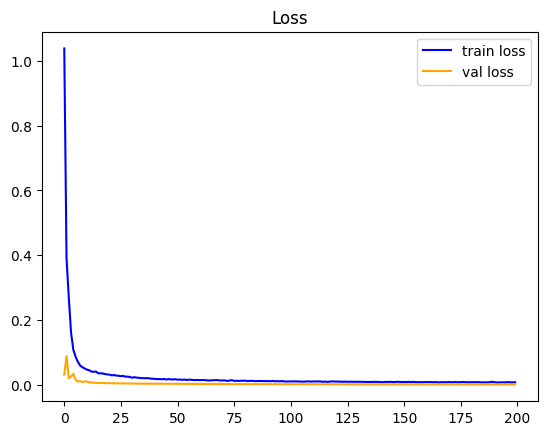

In [49]:
fig=plt.figure()
plt.plot(history_single_step.history['loss'],color='blue',label='train loss')
plt.plot(history_single_step.history['val_loss'],color='orange',label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

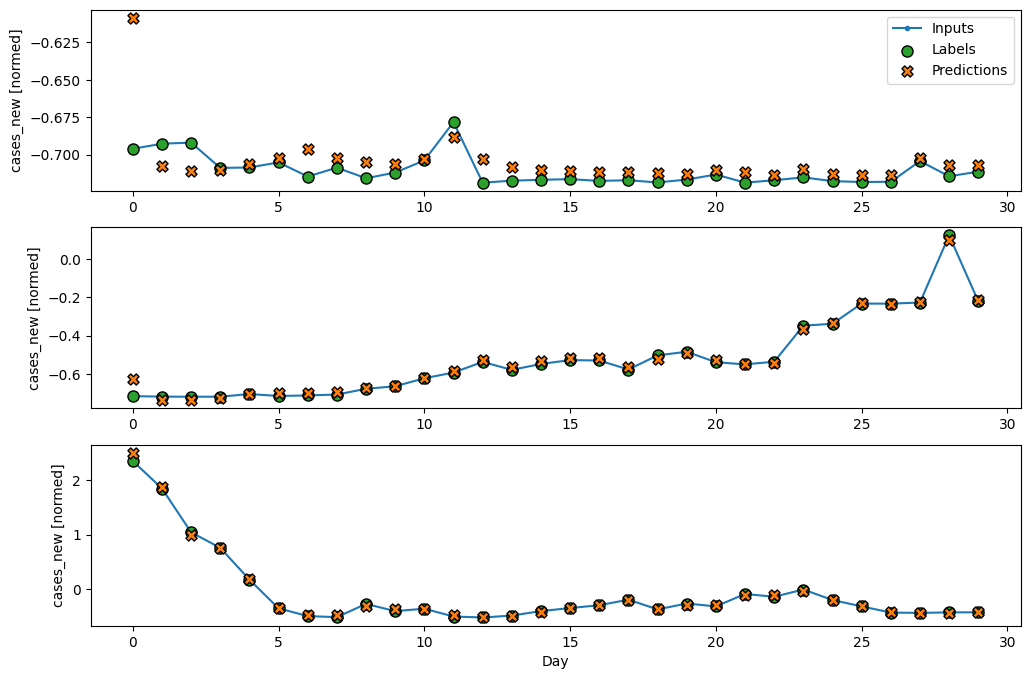

In [50]:
#Plot prediction 
w2.plot(model=lstm_model, plot_col='cases_new')

In [54]:
w3.test

<_MapDataset element_spec=(TensorSpec(shape=(None, 30, 30), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))>

In [59]:
#Evaluate on test data
#lstm_model.evaluate(w3.test)

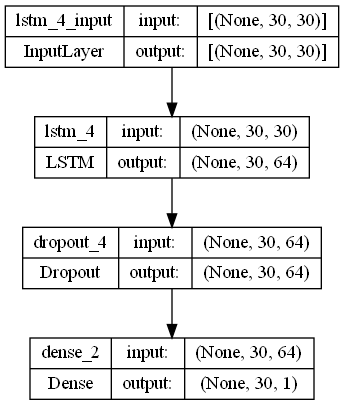

In [44]:
tf.keras.utils.plot_model(lstm_model, show_shapes=True)

In [57]:
#Save model
PATH =r'D:\SHRDC\DLTS\Covid 19 Cases Prediction\covid assessment'
model_save_path = os.path.join(PATH, 'saved_model', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(model_save_path, exist_ok=True)
lstm_model.save(model_save_path)

INFO:tensorflow:Assets written to: D:\SHRDC\DLTS\Covid 19 Cases Prediction\covid assessment\saved_model\20240123-194741\assets


INFO:tensorflow:Assets written to: D:\SHRDC\DLTS\Covid 19 Cases Prediction\covid assessment\saved_model\20240123-194741\assets
